# **Credit Card Fraud Detection**

### Models
* **Decision Trees**
* **Support Vector Machine (SVM)**

### Objectives
* Perform basic data preprocessing in python
* Model a classification task using the Scikit-Learn Python APIs
* Train Support Vector Machine and Decision Tree using Scikit-Learn
* Run inference and assess the quality of the trained models

### Introduction

A financial institution needs a model that predicts if a credit card transaction is fradulent or not. We can model the problem as a binary classification problem. A transaction belong to the positive class (1) if it is a fraud, otherwise it belongs to the negative class (0).

We have access to transactions that occured over a certain period of time. The majority of the transactions are normally legitimate and only a small fraction are non-legitimate. Thus, typically we have access to a dataset that is highly unbalanced. This is also the case of the current dataset: only 492 transactions out of 284,807 are fraudulent (the positive class - the frauds - accounts for 0.12% of all transactions).

This is a Kaggle dataset. We can find this dataset from the following link: [Credit Card Fraud Detection]("https://www.kaggle.com/mlg-ulb/creditcardfraud")

To train the model, we can use part of the input dataset, while the remaining data can be utilized to assess the quality of the trained model.

----

#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"

raw = pd.read_csv(url)

In [4]:
# Check data head
pd.set_option("display.max_columns", None)

print(raw.shape)
raw.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Dataset Analysis

Each row in the dataset represents a credit card transaction. As shown above, each row has 31 variable. One variable (the last variable in the table above) is called Class and represents the target variable. Our objective will be to train a model that uses the other variable to predict the value of the Class variable. 

Note: For confidentiality reasons, the original names of most features are anonymized V1, V2 .. V28. The values of these features are the result of a PCA transformation and are numerical. The feature 'Class' is the target variable and it takes two values: 1 in case of fraud and 0 otherwise. For more information about the dataset please visit this webpage: https://www.kaggle.com/mlg-ulb/creditcardfraud.


In [5]:
raw.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


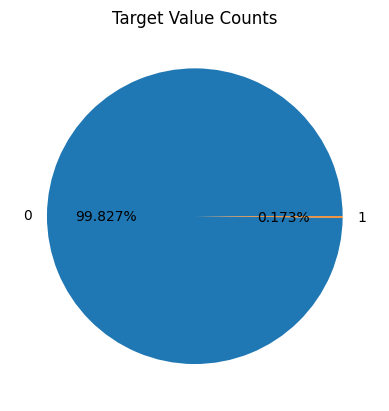

In [6]:
plt.pie(raw.Class.value_counts().values, labels=raw.Class.unique(), autopct='%1.3f%%')
plt.title("Target Value Counts")
plt.show()

As shown above, the `Class` variable (target) has two values:
* 0: the credit transaction is legitimate
* 1: the credit transaction is fraudulent

Thus, we need to model a binary classification problem. Moreover, the dataset is highly unbalanced, the target variable classes are not represented equally. This case requires special attention when training or when evaluating the quality of a model. One way of handing this cas at train time is to bias the model to pay more attention to the samples in the minority class. The models under the current study will be configured to take into account the class weights of the samples at train/fit time.

It is also prudent to understnad which features affect the model in what way.

<Axes: >

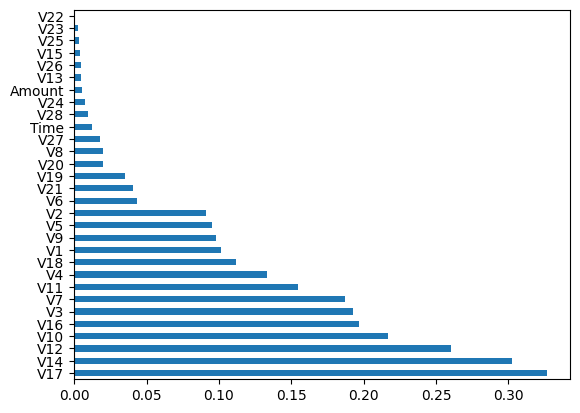

In [7]:
corr = raw.corr()['Class'].drop('Class').abs().sort_values(ascending=False)
corr.plot(kind='barh')

This clearly shows that some features affect the output `Class` more than the others. For efficient modeling, we may use only the most correlated features.

---

#### Dataset Train/Test Split
We need to first divide the pre-processed dataset into a subset to be used for training the model (the train set) and a subset to be used for evaluating the quality of the model (the test set).

In [8]:
raw.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
from sklearn.model_selection import train_test_split

X = raw.drop(['Time', 'Class'], axis=1).values
y = raw.Class.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### Dataset Preprocessing

We will now prepare the data for training. We will apply standard scaling to the input features and normalize them using $L_1$ norm for the training models to converge quickly. As seen in the data snapshot, there is a parameter called `Time` which we will not be considering for modeling. Hence, features 2 to 30 will be used as input features and feature 31, i.e. `Class` will be used as the target variable.

In [10]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

preprocessor = Pipeline([
        # Standardize
        ('std', StandardScaler()),
        ('norm', Normalizer(norm='l1'))
    ]).set_output(transform='pandas')

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

#### Build a Decision Tree Classifier model with Scikit-Learn
Compute the sample weights to be used as input to the train routine so that it takes into accounts the class imbalance present in this dataset.

In [11]:
from sklearn.utils import compute_sample_weight
w_train = compute_sample_weight('balanced', y_train)

Using these sample weights, we may train the Decision Tree Classifier. We also make note of the time it takes for training this model to compare it against SVM.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# For reproducible output across multiple function calls, set random_state to a given integer value
dt = DecisionTreeClassifier(max_depth=4, random_state=35)

dt.fit(X_train_scaled, y_train, sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

---

#### Build a Support Vector Machine model with Scikit-Learn
Unlike Decision Trees, we do not need to initiate a separate sample_weight for SVMs. We can simply pass a parameter in the scikit-learn function.

In [13]:
from sklearn.svm import LinearSVC

# For reproducible output across multiple function calls, set random state to a given integer value
svm = LinearSVC(class_weight='balanced', random_state=31, loss='hinge', fit_intercept=False)

svm.fit(X_train_scaled, y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

---

#### Evaluate the Decision Tree Classifier Models
Run the following cell to compute the probabilities of the test samples belonging to the class of fraudulent transactions.

In [99]:
y_pred_dt = dt.predict_proba(X_test_scaled)[:,1]
y_pred = dt.predict(X_test_scaled)

Using these probabilities, we can evaluate the Area Under the Receiver Operating Characteristic Curve (ROC-AUC) score as a metric of model performance. The AUC-ROC score evaluates our model's ability to distinguish positive and negative classes considering all possible probability thresholds. The higher its value, the better the model is considered for separating the two classes of values.

Decision Tree ROC-AUC score: 0.937
Accuracy Score: 0.971
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.05      0.84      0.09       148

    accuracy                           0.97     85443
   macro avg       0.52      0.90      0.54     85443
weighted avg       1.00      0.97      0.98     85443



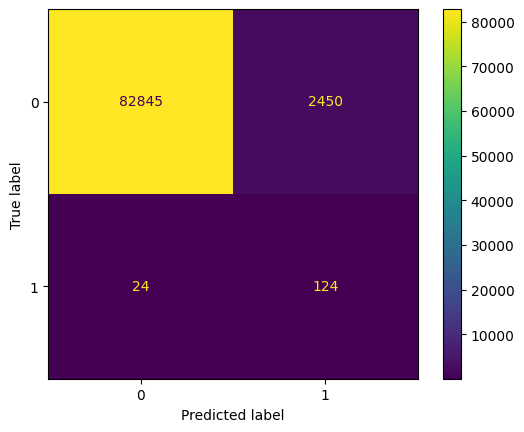

{'0': {'precision': 0.9997103862723093,
  'recall': 0.971276159212146,
  'f1-score': 0.9852881710710972,
  'support': 85295.0},
 '1': {'precision': 0.048174048174048176,
  'recall': 0.8378378378378378,
  'f1-score': 0.09110947832476121,
  'support': 148.0},
 'accuracy': 0.9710450241681589,
 'macro avg': {'precision': 0.5239422172231788,
  'recall': 0.9045569985249919,
  'f1-score': 0.5381988246979292,
  'support': 85443.0},
 'weighted avg': {'precision': 0.9980621836338424,
  'recall': 0.9710450241681589,
  'f1-score': 0.9837393204159651,
  'support': 85443.0}}

In [100]:
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)

print(f"Decision Tree ROC-AUC score: {roc_auc_dt:.3f}")
print("==="*12)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.3f}")
print(f"Classification Report:")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

classification_report(y_test, y_pred, output_dict=True)

#### Let's try changing the threshold

In [92]:
# Define a list of thresholds to test
thresholds = [0.5, 0.8, 0.9, 0.95]

print(f"{'Threshold':<10} | {'Precision (Class 1)':<20} | {'Recall (Class 1)':<20} | {'Fraud Caught':<15} | {'Innocent Blocked':<15}")
print("-" * 93)

for t in thresholds:
    # Apply the custom threshold
    # If prob > t, preidict 1 (Fraud), else 0 (Normal)
    y_pred_custom = (y_pred_dt > t).astype(int)

    # Extract metrics just for Class 1 (Fraud)
    report = classification_report(y_test, y_pred_custom, output_dict=True)
    precision = report['1']['precision']
    recall = report['1']['recall']

    # Get raw numbers from confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_custom).ravel()
    print(f"{t:<10} | {precision:.3f}{' ':<15} | {recall:.3f}{' ':<15} | {tp:<15} | {fp:<15}")

Threshold  | Precision (Class 1)  | Recall (Class 1)     | Fraud Caught    | Innocent Blocked
---------------------------------------------------------------------------------------------
0.5        | 0.048                | 0.838                | 124             | 2450           
0.8        | 0.126                | 0.791                | 117             | 809            
0.9        | 0.126                | 0.791                | 117             | 809            
0.95       | 0.141                | 0.791                | 117             | 714            


We can see that with threshold at 0.95 the racall didn't drop at all from 0.8. From this, we can set the threshold at 0.95.

In [93]:
final_prediction = (dt.predict_proba(X_test_scaled)[:,1]>0.95).astype(int)

---

#### Evaluate the Support Vectore Machine Models

In [97]:
y_pred_svm = svm.decision_function(X_test_scaled)

We may now evaluate the accuracy of SVM on the test set in terms of the ROC-AUC score.

In [103]:
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)

print(f"Decision Tree ROC-AUC score: {roc_auc_svm:.3f}")


Decision Tree ROC-AUC score: 0.971


In [105]:
# Define thresholds for SVM
# in SVM, these number are distance, not percentages
# 0.0 is the default. 0.5 and 1.0 are "stricter"
svm_thresholds = [0.0, 0.5, 1.0, 1.5]

print(f"{'Threshold':<10} | {'Precision':<10} | {'Recall':<10} | {'Fraud Caught':<15} | {'Innocent Blocked':<15}")
print("-" * 75)

for t in svm_thresholds:
    # Apply custom threshold
    y_pred_svm_custom = (y_pred_svm > t).astype(int)

    # Get numbers
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm_custom).ravel()

    # Calculate Precision/Recall manually to avoid zero-division errors
    prec = tp / (tp + fp) if (tp + fp) > 0 else 0
    rec = tp / (tp + fn) if (tp + fp) > 0 else 0

    print(f"{t:<10} | {prec:.3f}{' ':<6} | {rec:.3f}{' ':<6} | {tp:<15} | {fp:<15}")

Threshold  | Precision  | Recall     | Fraud Caught    | Innocent Blocked
---------------------------------------------------------------------------
0.0        | 0.010       | 0.932       | 138             | 13970          
0.5        | 0.017       | 0.912       | 135             | 7704           
1.0        | 0.025       | 0.892       | 132             | 5168           
1.5        | 0.034       | 0.845       | 125             | 3539           


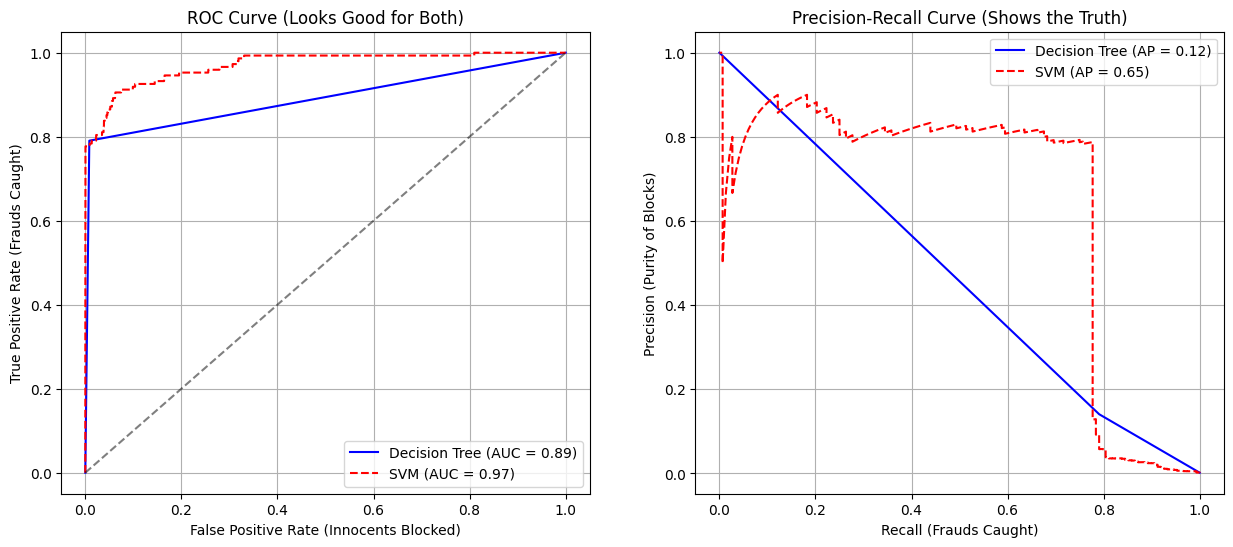

In [106]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# 1. Get Scores
# Tree: Use probabilities (0 to 1)
y_prob_dt = dt.predict_proba(X_test_scaled)[:, 1]

# SVM: Use decision function (distance scores)
y_score_svm = svm.decision_function(X_test_scaled)

# 2. Calculate Curves
# ROC Data
fpr_dt, tpr_dt, _ = roc_curve(y_test, final_prediction)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)

# Precision-Recall Data
prec_dt, rec_dt, _ = precision_recall_curve(y_test, final_prediction)
prec_svm, rec_svm, _ = precision_recall_curve(y_test, y_score_svm)

# 3. Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# --- Plot 1: ROC Curve (The "Optimistic" View) ---
ax1.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc(fpr_dt, tpr_dt):.2f})', color='blue')
ax1.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc(fpr_svm, tpr_svm):.2f})', color='red', linestyle='--')
ax1.plot([0, 1], [0, 1], 'k--', alpha=0.5) # Random guessing line
ax1.set_xlabel('False Positive Rate (Innocents Blocked)')
ax1.set_ylabel('True Positive Rate (Frauds Caught)')
ax1.set_title('ROC Curve (Looks Good for Both)')
ax1.legend()
ax1.grid(True)

# --- Plot 2: Precision-Recall Curve (The "Real" View) ---
ax2.plot(rec_dt, prec_dt, label=f'Decision Tree (AP = {average_precision_score(y_test, y_prob_dt):.2f})', color='blue')
ax2.plot(rec_svm, prec_svm, label=f'SVM (AP = {average_precision_score(y_test, y_score_svm):.2f})', color='red', linestyle='--')
ax2.set_xlabel('Recall (Frauds Caught)')
ax2.set_ylabel('Precision (Purity of Blocks)')
ax2.set_title('Precision-Recall Curve (Shows the Truth)')
ax2.legend()
ax2.grid(True)

plt.show()

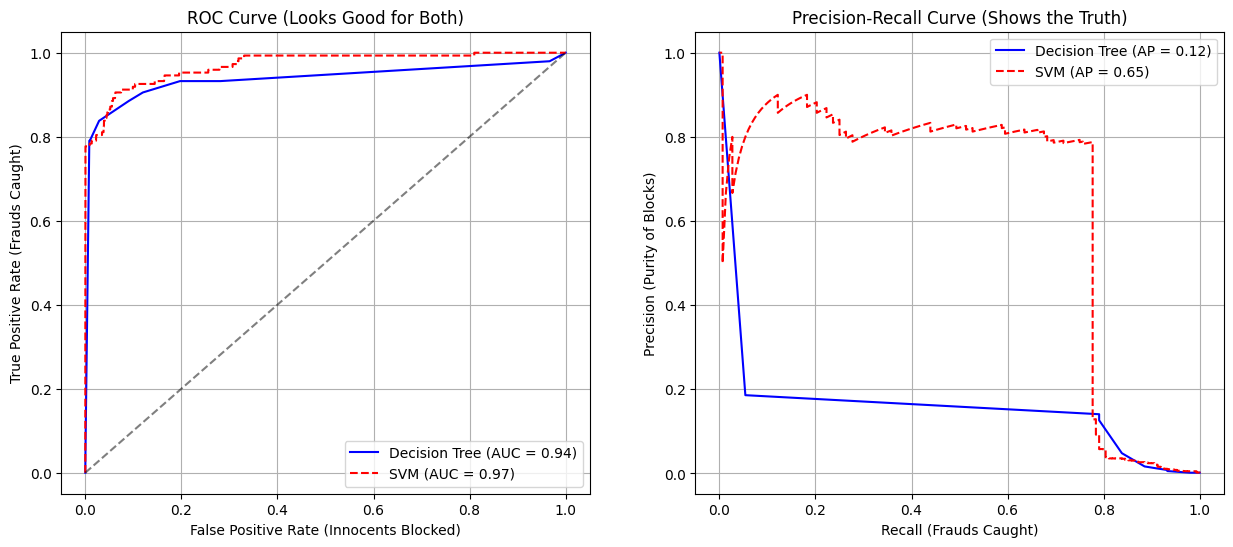

In [107]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# 1. Get Scores
# Tree: Use probabilities (0 to 1)
y_prob_dt = dt.predict_proba(X_test_scaled)[:, 1]

# SVM: Use decision function (distance scores)
y_score_svm = svm.decision_function(X_test_scaled)

# 2. Calculate Curves
# ROC Data
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)

# Precision-Recall Data
prec_dt, rec_dt, _ = precision_recall_curve(y_test, y_prob_dt)
prec_svm, rec_svm, _ = precision_recall_curve(y_test, y_score_svm)

# 3. Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# --- Plot 1: ROC Curve (The "Optimistic" View) ---
ax1.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc(fpr_dt, tpr_dt):.2f})', color='blue')
ax1.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc(fpr_svm, tpr_svm):.2f})', color='red', linestyle='--')
ax1.plot([0, 1], [0, 1], 'k--', alpha=0.5) # Random guessing line
ax1.set_xlabel('False Positive Rate (Innocents Blocked)')
ax1.set_ylabel('True Positive Rate (Frauds Caught)')
ax1.set_title('ROC Curve (Looks Good for Both)')
ax1.legend()
ax1.grid(True)

# --- Plot 2: Precision-Recall Curve (The "Real" View) ---
ax2.plot(rec_dt, prec_dt, label=f'Decision Tree (AP = {average_precision_score(y_test, y_prob_dt):.2f})', color='blue')
ax2.plot(rec_svm, prec_svm, label=f'SVM (AP = {average_precision_score(y_test, y_score_svm):.2f})', color='red', linestyle='--')
ax2.set_xlabel('Recall (Frauds Caught)')
ax2.set_ylabel('Precision (Purity of Blocks)')
ax2.set_title('Precision-Recall Curve (Shows the Truth)')
ax2.legend()
ax2.grid(True)

plt.show()

In [108]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# 1. Get the raw SVM scores again
y_scores_svm = svm.decision_function(X_test_scaled)

# 2. Calculate the Precision-Recall Curve data points
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores_svm)

# 3. Calculate F1 Score for every single possible threshold
# (F1 = Harmonic mean of Precision and Recall)
numerator = 2 * precisions * recalls
denominator = precisions + recalls
f1_scores = np.divide(numerator, denominator, out=np.zeros_like(numerator), where=denominator!=0)

# 4. Find the Index of the highest F1 Score
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
best_f1 = f1_scores[best_index]

print(f"The Magic SVM Threshold is: {best_threshold:.4f}")
print(f"At this threshold, F1 Score is: {best_f1:.4f}")

# 5. Let's see the stats at this specific magic number
y_pred_magic = (y_scores_svm > best_threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_magic).ravel()

print(f"\nStats at Threshold {best_threshold:.4f}:")
print(f"Fraud Caught: {tp}")
print(f"Innocent Blocked: {fp}")

The Magic SVM Threshold is: 13.5559
At this threshold, F1 Score is: 0.7823

Stats at Threshold 13.5559:
Fraud Caught: 114
Innocent Blocked: 31


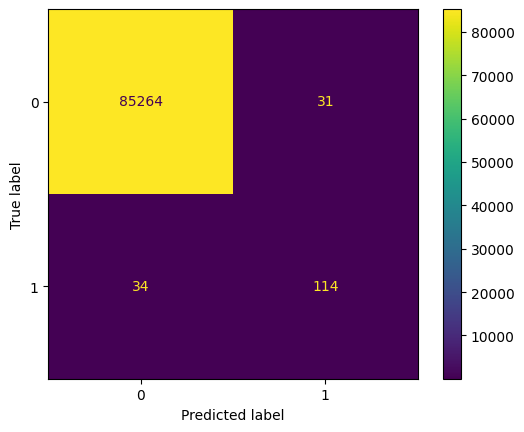

In [109]:
# Save the final threshold to the model
final_svm_predictions = (y_pred_svm > best_threshold).astype(int)

ConfusionMatrixDisplay.from_predictions(y_test, final_svm_predictions)
plt.show()

---